# Ford GoBike System DataAnalysis for greater San Francisco Bay area
## by Adegbite Paul Adekunle

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling

### The Data
Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#load the dataset into a dataframe and check the dataset visually
data = pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
data.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
#just checking the bike_share_for_all_trip out
data[data['bike_share_for_all_trip'] == 'Yes'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17359 entries, 4 to 183409
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             17359 non-null  int64  
 1   start_time               17359 non-null  object 
 2   end_time                 17359 non-null  object 
 3   start_station_id         17346 non-null  float64
 4   start_station_name       17346 non-null  object 
 5   start_station_latitude   17359 non-null  float64
 6   start_station_longitude  17359 non-null  float64
 7   end_station_id           17346 non-null  float64
 8   end_station_name         17346 non-null  object 
 9   end_station_latitude     17359 non-null  float64
 10  end_station_longitude    17359 non-null  float64
 11  bike_id                  17359 non-null  int64  
 12  user_type                17359 non-null  object 
 13  member_birth_year        17359 non-null  float64
 14  member_gender        

In [5]:
#check the information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#get statistical information on the dataset
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#get the dtypes of each column
data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [8]:
#check for nulls in the dataset
data.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
#check for duplicated data
data.duplicated().sum()

0

In [10]:
#check for unique values
data.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

## Data cleaning
### Data quality issues
- start_time and end_time columns should be in a datetime format
- bike_id,start_station_id and end_station_id should be in object format
- user_type,member_gender,bike_share_for_all_trip should all be in a categorical type
- drop null values 
- perform some feture engineering on start_time and end_time
- drop some not so usefull features

these issues will be sorted in no particular order

In [11]:
#make a copy of the original dataframe to perform cleaning acts in it
data_copy = data.copy()

In [12]:
data_copy.dropna(inplace = True)

In [13]:
#a function that convert start_time and end_time to datetime datatype
data_copy['start_time'] = pd.to_datetime(data_copy['start_time'])
data_copy['end_time'] = pd.to_datetime(data_copy['end_time'])

In [14]:
#convert start_station_id and end_station_id to integer datatype
data_copy['start_station_id'] = data_copy['start_station_id'].astype('object')
data_copy['end_station_id'] = data_copy['end_station_id'].astype('object')
data_copy['bike_id'] = data_copy['bike_id'].astype('object')

In [15]:
#convert user_type,member_gender,bike_share_for_all_trip to categorical types
#user_type
print(data_copy.user_type.unique())
data_copy.user_type = data_copy.user_type.astype('category')

['Customer' 'Subscriber']


In [16]:
#member_gender
print(data_copy.member_gender.unique())
data_copy.member_gender = data_copy.member_gender.astype('category')

['Male' 'Other' 'Female']


In [17]:
#bike_share_for_all_trip
print(data_copy.bike_share_for_all_trip.unique())
data_copy.bike_share_for_all_trip = data_copy.bike_share_for_all_trip.astype('category')

['No' 'Yes']


#### Feature engineering:
- generate Hour feature from start_time column and convert this new feature to an ordered categorical datatype
- generate day-of-week from start_time column and convert this new feature to an ordered categorical datatype
- generate member-age from member_birth_year

month wasn't generated because the dataset only contain data from february 2019

In [18]:
#generate hour
data_copy['hour'] = data_copy['start_time'].apply(lambda x:x.hour)
#make the hour feature into an ordinal categorical type
hour = data_copy['hour'].unique().tolist()
hour.sort()
#this snippet of code is from our lessons
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    h_class = pd.api.types.CategoricalDtype(ordered = True, categories = hour)
    data_copy['hour'] = data_copy['hour'].astype(h_class)
else: # pre-v0.21
    data_copy['hour'] = data_copy['hour'].astype('category', ordered = True,categories = hour)
data_copy['hour'].unique()

[17, 12, 23, 22, 21, ..., 6, 4, 3, 2, 1]
Length: 24
Categories (24, int64): [0 < 1 < 2 < 3 ... 20 < 21 < 22 < 23]

In [19]:
#generate day-of-week
data_copy['dayOfWeek'] = data_copy.start_time.dt.day_name().astype('str')
#make dayOfWeek into an ordinal categorical datatype
day = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
#this snippet of code is from our lessons
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    d_class = pd.api.types.CategoricalDtype(ordered = True, categories = day)
    data_copy['dayOfWeek'] = data_copy['dayOfWeek'].astype(d_class)
else: # pre-v0.21
    data_copy['dayOfWeek'] = data_copy['dayOfWeek'].astype('category', ordered = True,categories = day)
data_copy['dayOfWeek'].unique()

['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [20]:
# convert member_birth_year to integer datatype and generate member ages from this column
data_copy['member_birth_year'] = data_copy['member_birth_year'].astype('int')
data_copy['member_age'] = 2022 - data_copy['member_birth_year']

In [21]:
#then some columns can now be dropped
def drop_col_rows(data,col_row,axis = None):
    data.drop(col_row,axis = axis,inplace = True)
    return 'column or row passed have been dropped'
col = ['start_time','member_birth_year']
drop_col_rows(data_copy,col,axis = 1)

'column or row passed have been dropped'

In [22]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  object        
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  object        
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  object        
 11  user_type                174952 non-null  category      
 12  member_gender   

In [23]:
#save cleaned file 
data_copy.to_csv('201902-fordgobike-tripdata-cleaned.csv',index = False)

### What is the structure of your dataset?

> AFTER WRANGLING
The dataset contains 17 features and 174952 bike trips in 2019 in the greater san fransisco area,The features in the dataset can be grouped into:
- duration: containing (duration_sec,end_time)
- station information: containing (start_station_latitude,start_station_longitude,start_station_id,end_station_id,end_station_name,start_station_name,end_station_latitude,end_station_longitude)
- user information: contining(bike_id,member_gender,user_type,bike_share_for_all_trip)
- some new features: hour,member_age,dayofweek

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in exploring the duration features and how it relates to features like hour of day,dayofweek and how these features relate to users in terms of their gender,age,i would also like to check how each station performs in terms of how much activity occurs per day,also what gender takes bike the most,i also want to see which stations get used the most....

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features i think will help are the duration_sec,start_station_name,member_gender,member_age,user_type

## Univariate Exploration

#### I'll start by looking at the member_gender

In [24]:
mem_gen_frq = data_copy.member_gender.value_counts()
ord_frq = mem_gen_frq.index
mem_gen_frq

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

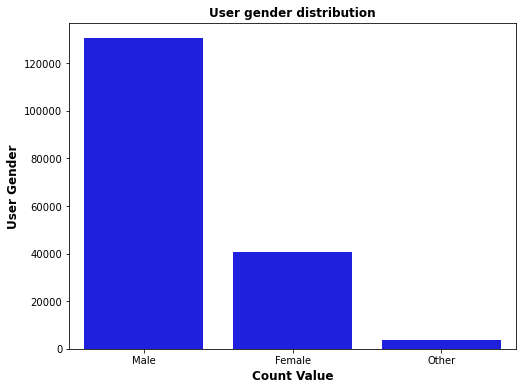

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(data=data_copy,x = 'member_gender',order=ord_frq,color = 'blue')
plt.xlabel('Count Value',fontdict = {'size':12,'weight':'bold'})
plt.ylabel('User Gender',fontdict = {'size':12,'weight':'bold'})
plt.title('User gender distribution',fontdict = {'size':12,'weight':'bold'});

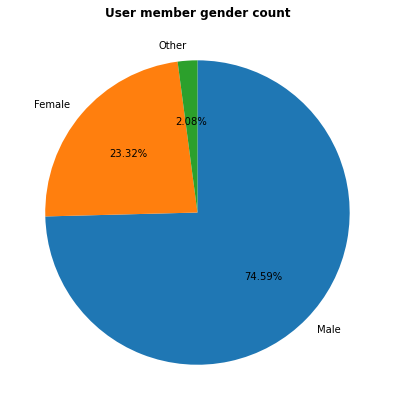

In [26]:
#show percentage of user gender using pie chart
plt.figure(figsize = (7,7))
plt.pie(mem_gen_frq,labels=ord_frq,counterclock=False,startangle=90,autopct='%1.2f%%',colors = sns.color_palette()[:3])
plt.title('User member gender count',fontdict = {'size':12,'weight':'bold'})
plt.show()

> The male gender mostly used this service with 74.59 percentage

#### Next, i will check the different member user type

In [27]:
ut_frq = data_copy.user_type.value_counts()
ord_ut_frq = ut_frq.index
ut_frq

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

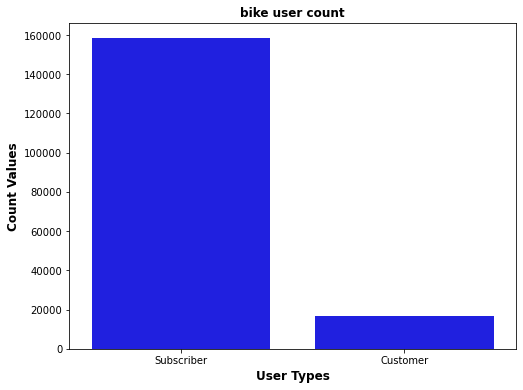

In [28]:
plt.figure(figsize = (8,6))
sns.countplot(data=data_copy,x = 'user_type',order = ord_ut_frq,color = 'blue')
plt.xlabel('User Types',fontdict = {'size':12,'weight':'bold'})
plt.ylabel('Count Values',fontdict = {'size':12,'weight':'bold'})
plt.title('bike user count',fontdict = {'size':12,'weight':'bold'})
plt.show()

> There is a substancial difference between subscribers and customers with subscribers being the majority

####  what is the distribution of duration per trip

In [29]:
data_copy.duration_sec.describe()['50%'] / 60

8.5

##### average duration time is approcimately 9 miniutes

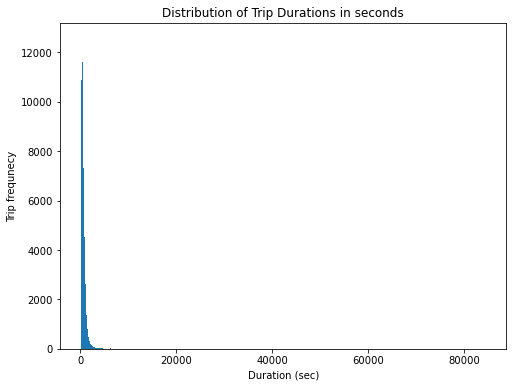

In [30]:
b = np.arange(0,data_copy.duration_sec.max() + 50, 50)
plt.figure(figsize=[8, 6])
plt.hist(data = data_copy, x = 'duration_sec', bins = b)
plt.title('Distribution of Trip Durations in seconds')
plt.xlabel('Duration (sec)')
plt.ylabel('Trip frequnecy');

#### duration is highly skewed to the right,we log transform it....

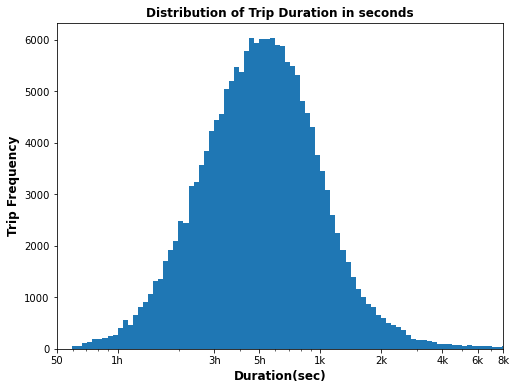

In [31]:
bin_edges=10 ** np.arange(0, np.log10(data_copy.duration_sec.max())+0.025, 0.025)
plt.figure(figsize = (8,6))
plt.hist(data = data_copy,x='duration_sec',bins = bin_edges)
plt.xscale('log')
plt.xticks([50,100,300,500,1000,2000,4000,6000,8000],['50','1h','3h','5h','1k','2k','4k','6k','8k'])
plt.xlabel('Duration(sec)',fontdict = {'size':12,'weight':'bold'})
plt.ylabel('Trip Frequency',fontdict = {'size':12,'weight':'bold'})
plt.xlim([50,8000])
plt.title('Distribution of Trip Duration in seconds',fontdict = {'size':12,'weight':'bold'})
plt.show()

#### after setting the lower bound to 50 and upper bound to eight thousand, we have a somewhat normal disribution

In [32]:
data_copy.duration_sec.quantile((95/100)) / 60

25.516666666666666

#####  the trips are short in duration because 95 percent of the trips are 1531.0 seconds which is approximately 26 mins

### next we check distribution of user_age

In [33]:
data_copy.member_age.value_counts().sort_index(ascending=False)

144       1
122      53
121       6
120      11
112       1
       ... 
25     3476
24     3208
23     2504
22     1675
21       34
Name: member_age, Length: 75, dtype: int64

In [34]:
data_copy.member_age.describe()['50%'] 

35.0

> #### average age is 35 years, the highest age is 144 years,while the min age is 20

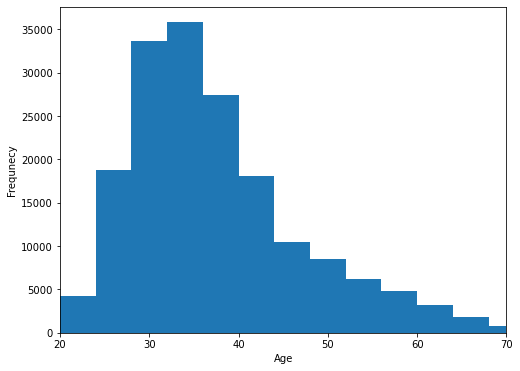

In [35]:
bin_edges = np.arange(20,144 + 4,4)
plt.figure(figsize = (8,6))
plt.hist(data=data_copy,x = 'member_age',bins = bin_edges)
plt.xlim([20,70])
plt.xlabel('Age')
plt.ylabel('Frequnecy')
plt.show()

> ##### age is rightly skewed with high frequency between 25 and 45,after making 80 the upper bound

### next, i will check hour,dayofweek and bike share for all trips

In [36]:
h_counts = data_copy['hour'].value_counts()
ord_h_freq = h_counts.index
h_counts

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: hour, dtype: int64

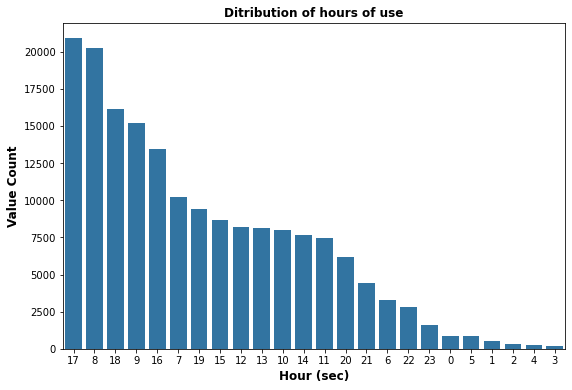

In [37]:
plt.figure(figsize = (9,6))
sns.countplot(data = data_copy,x = 'hour',order=ord_h_freq,color = sns.color_palette()[0])
plt.xlabel('Hour (sec)',fontdict = dict(size = 12,weight = 'bold'))
plt.ylabel('Value Count',fontdict = dict(size = 12,weight = 'bold'))
plt.title('Ditribution of hours of use',fontdict = dict(size = 12,weight = 'bold'))
plt.show()

In [38]:
d_counts = data_copy['dayOfWeek'].value_counts()
ord_d_freq = d_counts.index
d_counts

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: dayOfWeek, dtype: int64

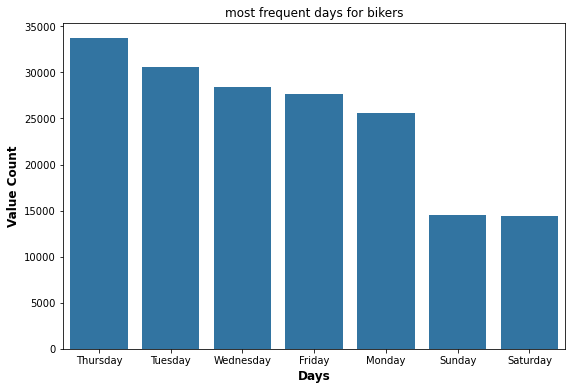

In [88]:
plt.figure(figsize = (9,6))
sns.countplot(data = data_copy,x = 'dayOfWeek',order=ord_d_freq,color = sns.color_palette()[0])
plt.xlabel('Days',fontdict = dict(size = 12,weight = 'bold'))
plt.ylabel('Value Count',fontdict = dict(size = 12,weight = 'bold'))
plt.title('most frequent days for bikers',fontdict = dict(size = 12,weight = 'bold'))
plt.show()

In [40]:
bsf_counts = data_copy['bike_share_for_all_trip'].value_counts()
ord_bsf_freq = bsf_counts.index
bsf_counts

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

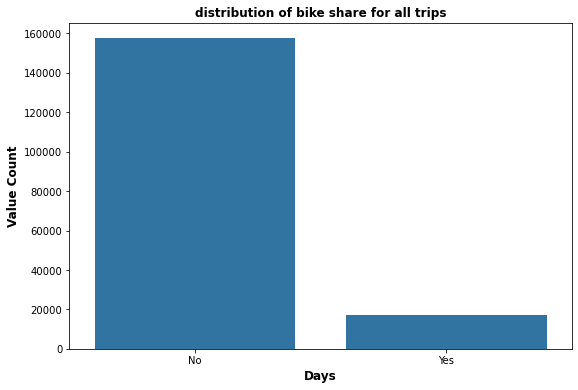

In [41]:
plt.figure(figsize = (9,6))
sns.countplot(data = data_copy,x = 'bike_share_for_all_trip',order=ord_bsf_freq,color = sns.color_palette()[0])
plt.xlabel('Days',fontdict = dict(size = 12,weight = 'bold'))
plt.ylabel('Value Count',fontdict = dict(size = 12,weight = 'bold'))
plt.title('distribution of bike share for all trips',fontdict = dict(size = 12,weight = 'bold'))
plt.show()

> #### majority of users do not use bike share for trips

### Analysis on stations

#### analysis on start-station

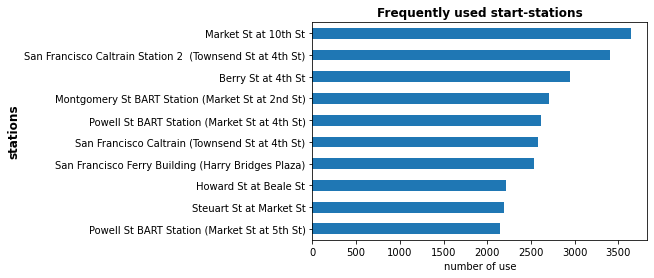

In [42]:
plt.title('Frequently used start-stations',fontdict = dict(size = 12,weight = 'bold'))
data_copy['start_station_name'].value_counts(ascending=True).tail(10).plot(kind = 'barh')
plt.ylabel('stations',fontdict = dict(size = 12,weight = 'bold'))
plt.xlabel('number of use')
plt.show()

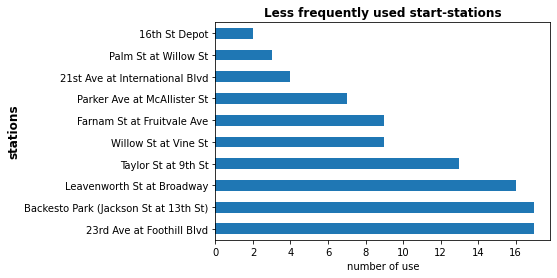

In [43]:
plt.title('Less frequently used start-stations',fontdict = dict(size = 12,weight = 'bold'))
data_copy.start_station_name.value_counts(ascending=False).tail(10).plot(kind = 'barh')
plt.ylabel('stations',fontdict = dict(size = 12,weight = 'bold'))
plt.xlabel('number of use')
plt.show()

#### analysis on end station

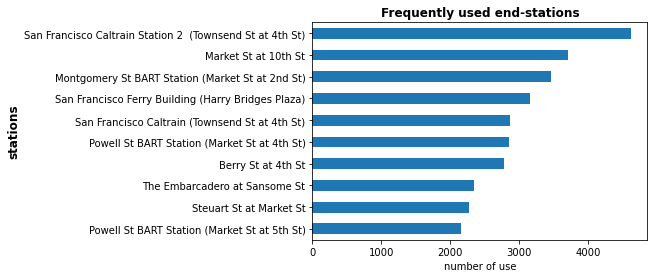

In [44]:
plt.title('Frequently used end-stations',fontdict = dict(size = 12,weight = 'bold'))
data_copy['end_station_name'].value_counts(ascending=True).tail(10).plot(kind = 'barh')
plt.ylabel('stations',fontdict = dict(size = 12,weight = 'bold'))
plt.xlabel('number of use')
plt.show()

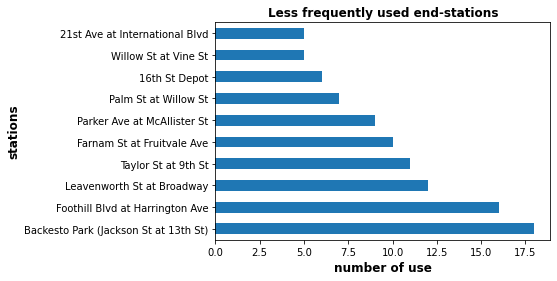

In [45]:
plt.title('Less frequently used end-stations',fontdict = dict(size = 12,weight = 'bold'))
data_copy.end_station_name.value_counts(ascending=False).tail(10).plot(kind = 'barh')
plt.ylabel('stations',fontdict = dict(size = 12,weight = 'bold'))
plt.xlabel('number of use',fontdict = dict(size = 12,weight = 'bold'))
plt.show()

##### we can see that the highest bound for duration is 8000 and that of age is 70,anything above that is an outlier and we can remove them from the data because the size is insignificant to the analysis

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

  - The plot shos that majority of the users are male
  - The plots shows that majority of the users are subscribers
  - The service is mostly used during working hours around 7 - 9 am and 4 - 6 pm
  - This trip service is mostly used during the weekdays as seen that it was mostly used during work hours
  - The distribution of age is rightly skewed,before log scaling it
  - The distribution of duration is rightly skewed,before log scaling it

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It was discovered that the total number of outlier for duration and are was 1501 and any trips fitting these outlier was dropped

## Bivariate Exploration


### relationship between duration sec and age

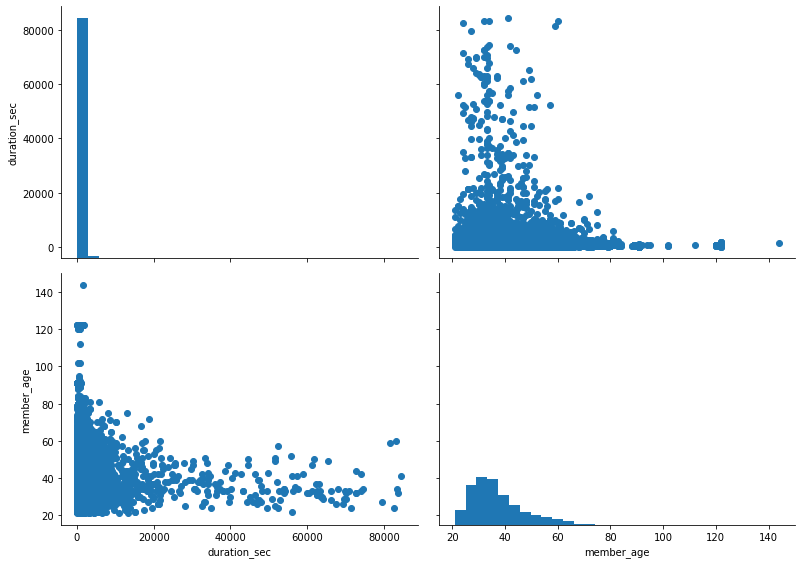

In [46]:
### checking numeric variables duration and age
g = sns.PairGrid(data=data_copy,vars=['duration_sec','member_age'],size = 4,aspect =  1.4)
g.map_diag(plt.hist,bins = 30)
g.map_offdiag(plt.scatter);

> ##### There seem to be a linear relationshp between member_age and duration_sec,however we can perform a log transformationon duration_sec to see if there is any relationship between them taking a sample of 1000

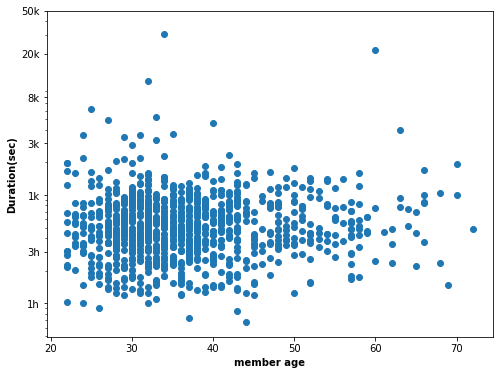

In [47]:
plt.figure(figsize = (8,6))
plt.scatter(data = data_copy.sample(1000),x = 'member_age',y = 'duration_sec')
plt.yscale('log') 
plt.ylabel('Duration(sec)',fontdict={'size':10,'weight':'bold'})
plt.xlabel('member age',fontdict={'size':10,'weight':'bold'})
plt.yticks([100,300,1000,3000,8000,20000,50000],['1h','3h','1k','3k','8k','20k','50k'])
#plt.xticks([20,30,40,50,70,80,90],['1h','3h','1k','3k','8k','20k','50k'])
plt.show()

> ##### Now we can see that there is no apparent relationship between duration and age after performing log transformation and scaling

### Numeric variables against categorical variables

<Figure size 1440x720 with 0 Axes>

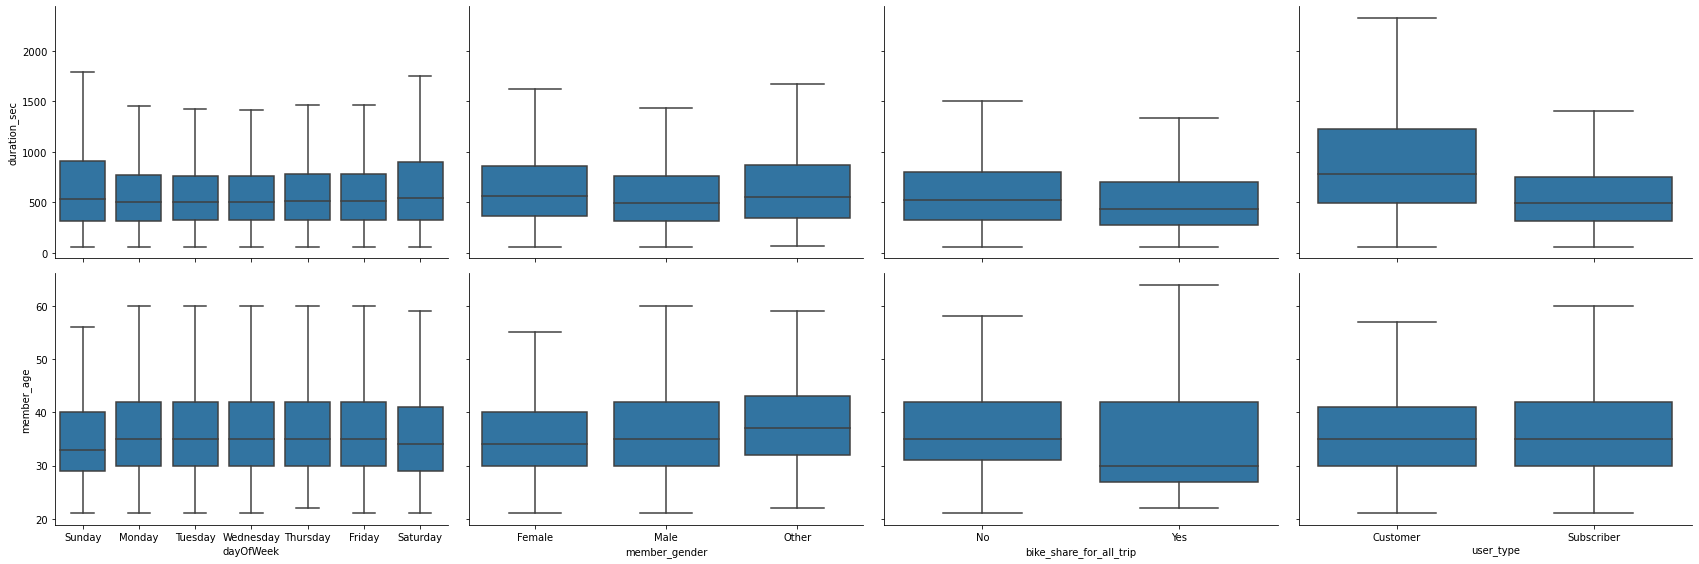

In [48]:
num_v = ['duration_sec','member_age']
cate_v = ['dayOfWeek','member_gender','bike_share_for_all_trip','user_type']
plt.figure(figsize = (20,10))
g  = sns.PairGrid(data=data_copy,x_vars=cate_v,y_vars=num_v,aspect = 1.5,size = 4)
g.map(sns.boxplot,color = sns.color_palette()[0],showfliers = False)
plt.show()

> Duration
- we can see that for dayOfweek on average, bike rides take longer on saturday and sunday compared to weekdays perhaps because bike riders aren't in a hurry to get to work.
- we can see that on average,female riders trip's are longer than male rider's trips
- on average customers take more trip duration than subcribers
> Age
- riders on weekdays(mon-fri) are older than riders on weekends(sat and sun)
- riders who dont specify thier gender are older than riders that do,also male riders are genrally older than female riders
- subscriber riders are genrally older than Customer riders

### check categorical feature hour against numerical features age

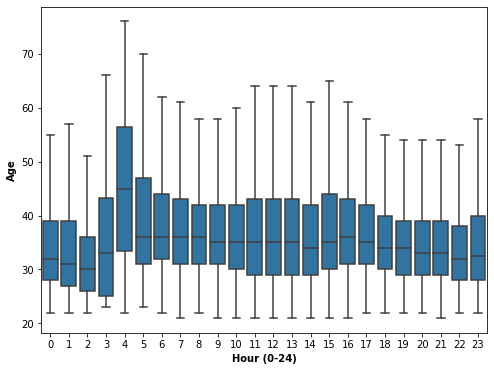

In [49]:
plt.figure(figsize = (8,6))
sns.boxplot(data = data_copy,x = 'hour',y = 'member_age',showfliers = False,color = sns.color_palette()[0])
plt.xlabel('Hour (0-24)',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Age',fontdict={'size':10,'weight':'bold'})
plt.show()

##### On average, there is higher number of bikers that their trip by 4 am,folowed by 5 am

### check categorical feature hour against numerical features duration

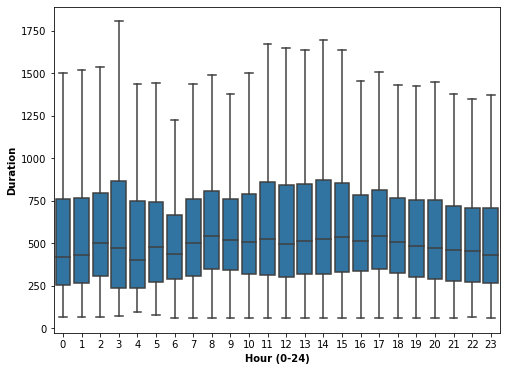

In [50]:
plt.figure(figsize = (8,6))
sns.boxplot(data = data_copy,x = 'hour',y = 'duration_sec',showfliers = False,color = sns.color_palette()[0])
plt.xlabel('Hour (0-24)',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Duration',fontdict={'size':10,'weight':'bold'})
plt.show()

#### on average,bikers who embark on trips at 3am spends more time on thier trips,bikers who move between 7am and 3 pm have long trips

### check relationship between categorical features

#### now we will plot the categorial features against duration after taking its log  transformation

In [51]:
#this snippet of code was giving in the study
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [52]:
#feature engineer log duration from duration seconds
data_copy['Dura_Log'] = data_copy['duration_sec'].apply(log_trans)

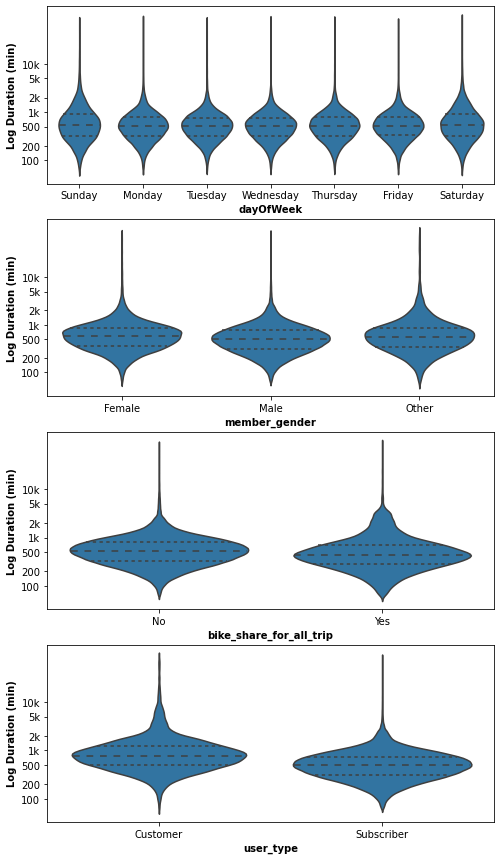

In [53]:
fig,ax = plt.subplots(ncols=1,nrows = 4,figsize = (8,15))
for col,ax in zip(cate_v,ax.ravel()):
    sns.violinplot(data=data_copy,y='Dura_Log',x = col,ax=ax,inner = 'quartile',color=sns.color_palette()[0])
    ax.set_yticks(log_trans(np.array([100,200,500,1000,2000,5000,10000])))
    ax.set_yticklabels([100,200,500,'1k','2k','5k','10k'])
    ax.set_xlabel('{}'.format(col),fontdict={'size':10,'weight':'bold'})
    ax.set_ylabel('Log Duration (min)',fontdict={'size':10,'weight':'bold'})

- The shape of the violin for gender has the same width for male and female
- As seen in the violins for user types,customers has more bike trips durations than subscribers

#### now we will plot the categorial features against age

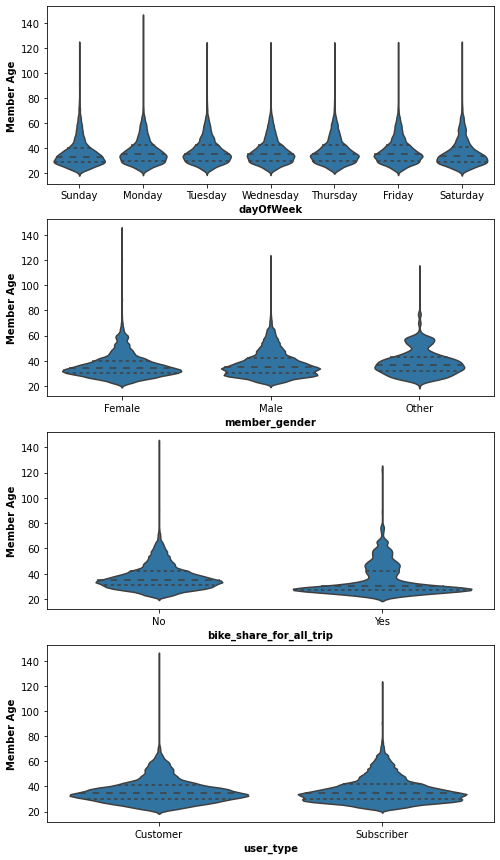

In [54]:
fig,ax = plt.subplots(ncols=1,nrows = 4,figsize = (8,15))
for col,ax in zip(cate_v,ax.ravel()):
    sns.violinplot(data=data_copy,y='member_age',x = col,ax=ax,inner='quartile',color=sns.color_palette()[0])
    ax.set_xlabel('{}'.format(col),fontdict={'size':10,'weight':'bold'})
    ax.set_ylabel('Member Age',fontdict={'size':10,'weight':'bold'})

- The violins for different days of week in relations to age isn't that different in their shapes
- Male bikers seems to be slightly older than female bikers as seen in the violins difference
- Subscribers user type also seems have more older bikers than customer user types

###### hour against user type

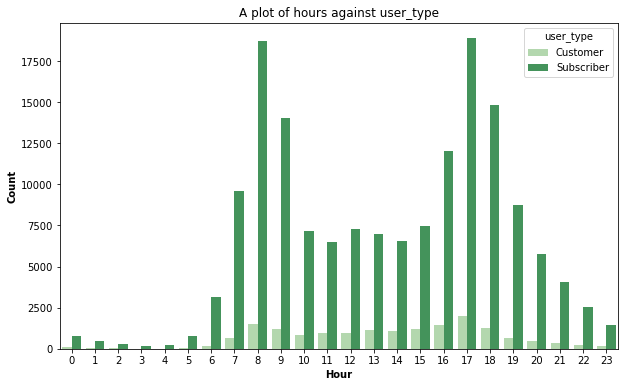

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_copy,x = 'hour',hue = 'user_type',palette = 'Greens')
plt.xlabel('Hour',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.title('A plot of hours against user_type')
plt.show()

###### dayofweek against user type

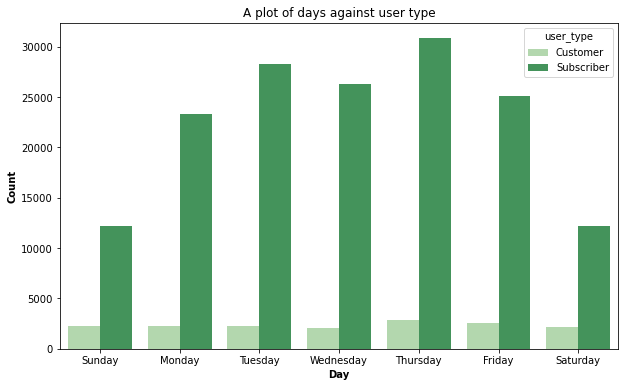

In [86]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'dayOfWeek',hue = 'user_type',palette = 'Greens')
plt.xlabel('Day',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.title('A plot of days against user type')
plt.show()

##### hour againts dayofweek

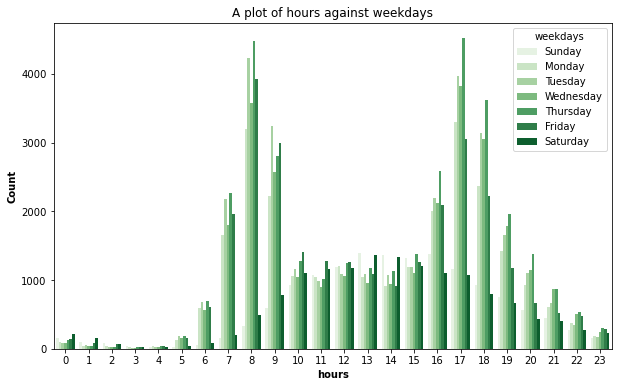

In [85]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'hour',hue = 'dayOfWeek',palette = 'Greens')
plt.xlabel('hours',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.legend(loc = 'best',title = 'weekdays')
plt.title('A plot of hours against weekdays')
plt.show()

- weekdays are the busiest between 7 am and 8pm but there isn't much trips between 10 am and 3 pm wihch should be work hours ideally.
- on weekends,it is busy between 11pm and 2am
- across all week days and hours,subscribers have higher trips than customers

#### Hour agaist bike-share-for-all-trips

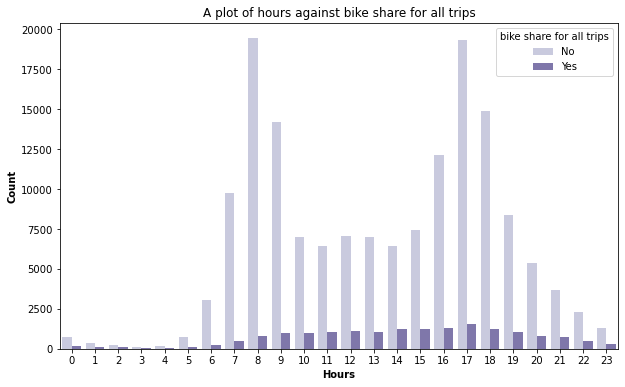

In [84]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'hour',hue = 'bike_share_for_all_trip',palette = 'Purples')
plt.xlabel('Hours',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.legend(loc = 'best',title = 'bike share for all trips')
plt.title('A plot of hours against bike share for all trips')
plt.show()

#### user type against bike share for all trips

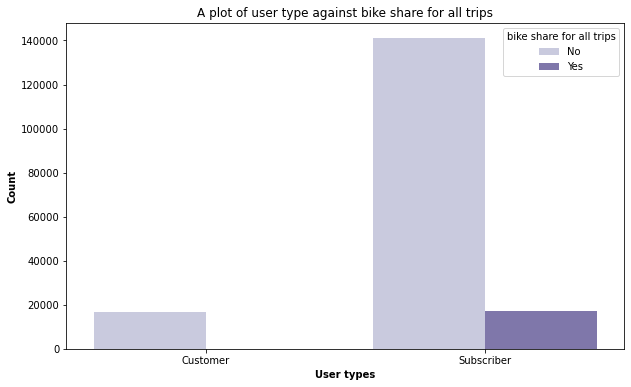

In [83]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'user_type',hue = 'bike_share_for_all_trip',palette = 'Purples')
plt.xlabel('User types',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.legend(loc = 'best',title = 'bike share for all trips')
plt.title('A plot of user type against bike share for all trips')
plt.show()

#### dayOfWeek against bike share for all trips

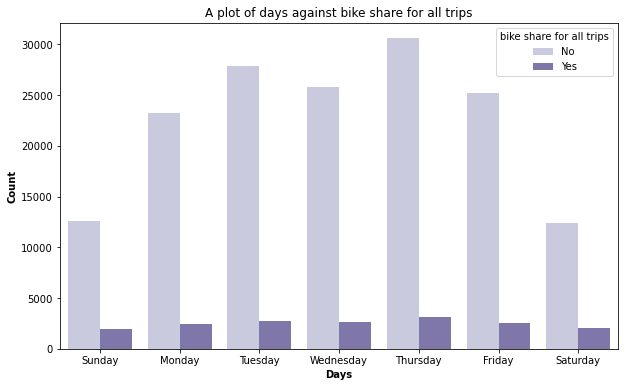

In [82]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'dayOfWeek',hue = 'bike_share_for_all_trip',palette = 'Purples')
plt.xlabel('Days',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.legend(loc = 'best',title = 'bike share for all trips')
plt.title('A plot of days against bike share for all trips')
plt.show()

- Bikers who do not use bike sharer for all trips engage in more trips acrross all hours of day and days of week compared to bikers that do.
- No customers have used bike share for all trips while some Subscribers use bike share for trips.

###### hour against gender

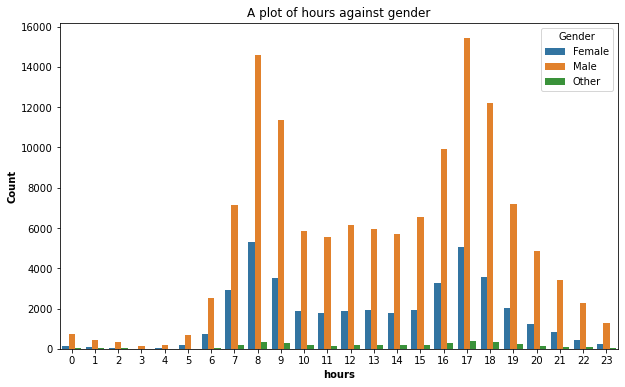

In [81]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'hour',hue = 'member_gender')
plt.xlabel('hours',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.legend(loc = 'best',title = 'Gender')
plt.title('A plot of hours against gender')
plt.show()

##### dayOfWeek against gender

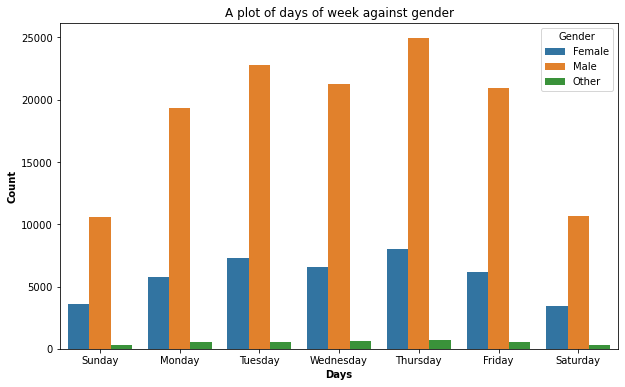

In [80]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'dayOfWeek',hue = 'member_gender')
plt.xlabel('Days',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.legend(loc = 'best',title = 'Gender')
plt.title('A plot of days of week against gender')
plt.show()

##### gender against user type

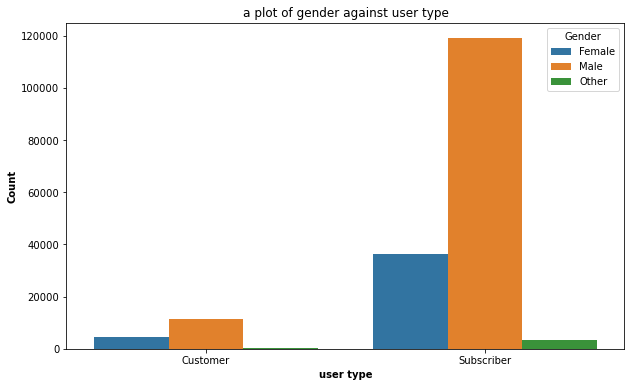

In [79]:
plt.figure(figsize = (10,6))
sns.countplot(data=data_copy,x = 'user_type',hue = 'member_gender')
plt.xlabel('user type',fontdict={'size':10,'weight':'bold'})
plt.ylabel('Count',fontdict={'size':10,'weight':'bold'})
plt.legend(loc = 'best',title = 'Gender')
plt.title('a plot of gender against user type')
plt.show()

- Male bikers have more trips compared to female bikers across all hours of the day and all days of the week
- Bikers who do not specify their gender is a very small portion of Customer and subcriber while male bikers carry the mojority for both user type
- Bikers use the service mostly on Thursday for all gender type.
- 8am and 5pm are the hours that bikers of all gender spend most time on trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- bikers that use the service on weekdays (Mon-Fri) are older than bikers on weekends (Sat-Sun).
- male bikers age are higher than female bikers on average
- On average, bike rides that start between 8 AM to 6 PM have longer durations as compared to other times of the day.
- across a week,thursday has highest trips
- 8 AM and 5 PM has the highest male and female bikers across 24 hours
- Bikers who do not specify their gender is a very small portion of Customer and subcriber while male bikers carry the mojority for both user type

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Customers do not use bike share for all trips

## Multivariate Exploration

#### i will start by checking the correlation between the two numerical variables

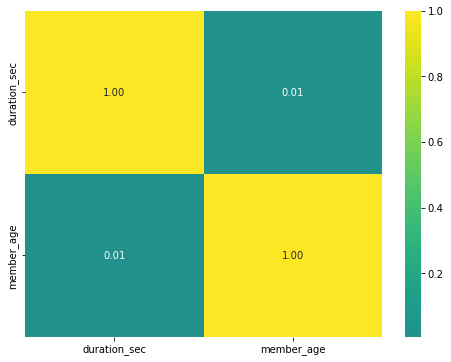

In [64]:
plt.figure(figsize = (8,6))
dat_co = ['duration_sec','member_age']
sns.heatmap(data=data_copy[dat_co].corr(),annot = True,fmt = '.2f',cmap = 'viridis',center = 0);

### exploration of categorical variables against age and duration

#### relationship between duration, age and week days

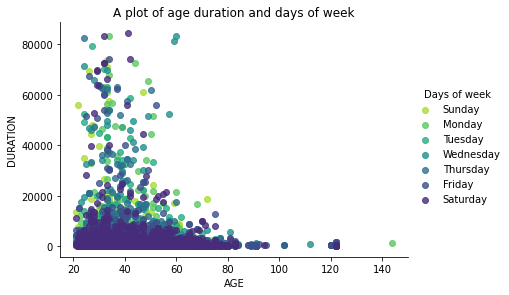

In [78]:
g = sns.FacetGrid(data=data_copy,hue = 'dayOfWeek',size = 4,aspect = 1.5,palette='viridis_r')
g.map(sns.regplot,'member_age','duration_sec',x_jitter = 0.04,fit_reg = False)
g.add_legend(title = 'Days of week')
plt.xlabel('AGE')
plt.title('A plot of age duration and days of week')
plt.ylabel('DURATION');

#### relationship between age,duration and gender

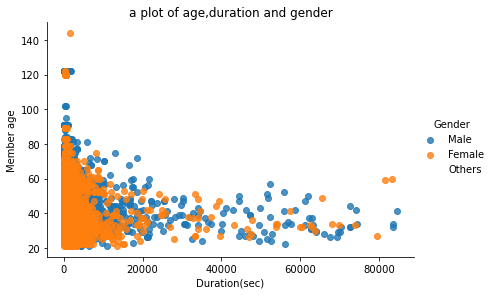

In [77]:
g = sns.FacetGrid(data=data_copy,hue = 'member_gender',hue_order=['Male','Female','Others'],size = 4,aspect = 1.5)
g.map(sns.regplot,'duration_sec','member_age',x_jitter = 0.04,fit_reg = False)
g.add_legend(title = 'Gender')
plt.xlabel('Duration(sec)')
plt.title('a plot of age,duration and gender')
plt.ylabel('Member age');

#### relationship between age,duration and user_type

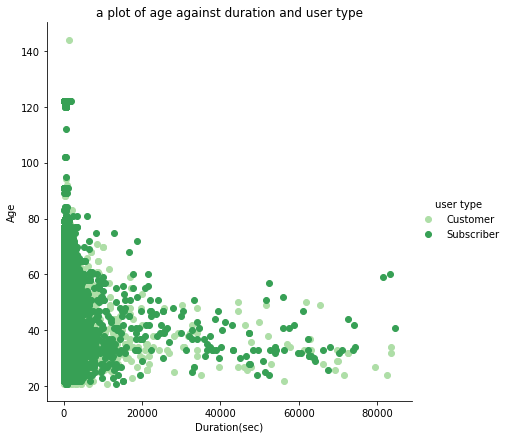

In [76]:
g = sns.FacetGrid(data = data_copy, hue = 'user_type', size = 6,
                 palette = 'Greens')
g.map(plt.scatter, 'duration_sec', 'member_age')
g.add_legend(title = 'user type')
plt.xlabel('Duration(sec)')
plt.title('a plot of age against duration and user type')
plt.ylabel('Age');

#### relationship between age,duration and bike share for all trip

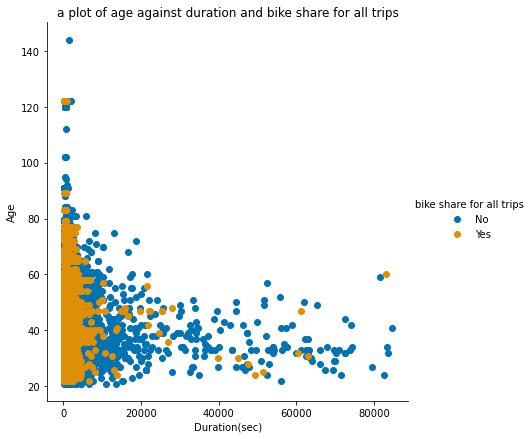

In [75]:
g = sns.FacetGrid(data = data_copy, hue = 'bike_share_for_all_trip', size = 6,
                 palette = 'colorblind')
g.map(plt.scatter, 'duration_sec', 'member_age')
g.add_legend(title = 'bike share for all trips')
plt.xlabel('Duration(sec)')
plt.ylabel('Age')
plt.title('a plot of age against duration and bike share for all trips');

#### relationship between hour,duration and member age

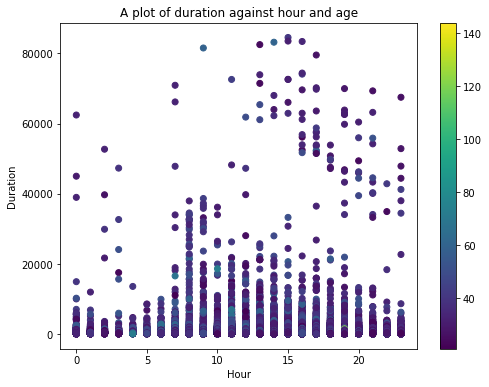

In [69]:
plt.figure(figsize = (8,6))
plt.scatter(data=data_copy,x = 'hour',y = 'duration_sec',c = 'member_age')
plt.colorbar()
plt.xlabel('Hour')
plt.ylabel('Duration')
plt.title('A plot of duration against hour and age')
plt.show()

#### plotting user_type,hour and days

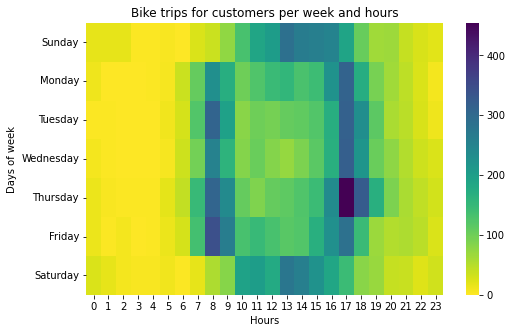

In [70]:
plt.figure(figsize = (8,5))
plt.title('Bike trips for customers per week and hours')
cust_Type = data_copy.query('user_type == "Customer"')
cust_counts = cust_Type.groupby(['dayOfWeek','hour']).size().reset_index(name = 'name').pivot(index = 'dayOfWeek',columns=['hour'],values = 'name')
sns.heatmap(data=cust_counts,fmt='.0f',cmap = 'viridis_r')
plt.ylabel('Days of week')
plt.xlabel('Hours');

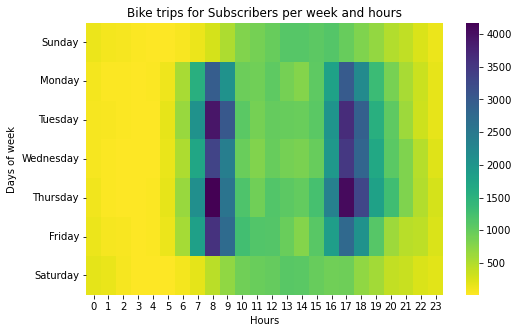

In [71]:
plt.figure(figsize = (8,5))
plt.title('Bike trips for Subscribers per week and hours')
cust_Type = data_copy.query('user_type == "Subscriber"')
cust_counts = cust_Type.groupby(['dayOfWeek','hour']).size().reset_index(name = 'name').pivot(index = 'dayOfWeek',columns=['hour'],values = 'name')
sns.heatmap(data=cust_counts,fmt='.0f',cmap = 'viridis_r')
plt.ylabel('Days of week')
plt.xlabel('Hours');

#### relationship between hour,days,age and log duration

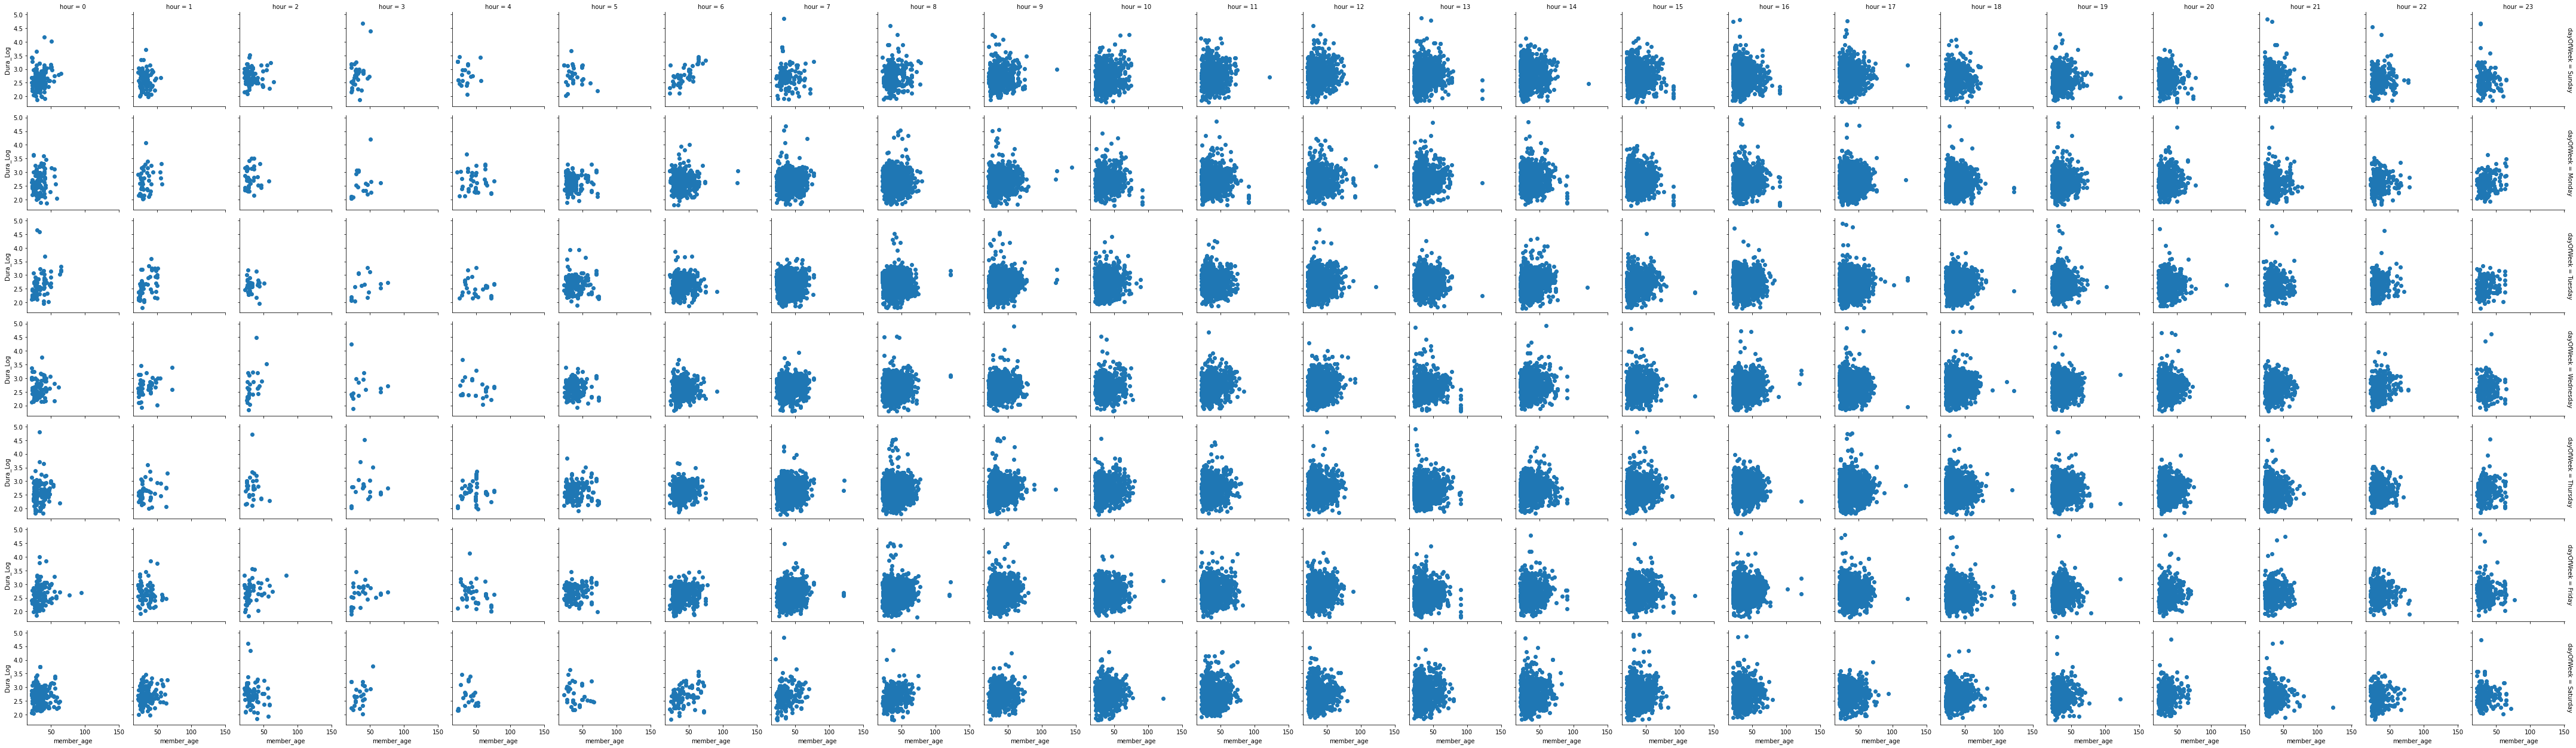

In [72]:
#plt.title('Bike trips for customers per week and hours')
g = sns.FacetGrid(data = data_copy, col = 'hour', row = 'dayOfWeek', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'member_age', 'Dura_Log');

#### relationship between gender,user_type,age and log duration

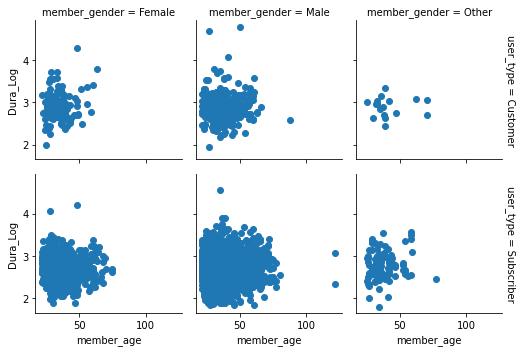

In [73]:
g = sns.FacetGrid(data = data_copy.sample(5000), col = 'member_gender', row = 'user_type', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'member_age', 'Dura_Log');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some of the observation noted during the multivariate explorarion have helped confirms some of the relationship learned from the univariate and bivariate exploration,it was observed that subscribers users do not engage in trips for long compared to customers because they mostly are old and trips are mostly done in workdays(mon -fri) between 5am -8am and 4pm-7pm which perhaps is work resumption time and end of work time.it also appears that for age,middle aged(25 -45) bikers used the service mostly for week ends(mon-fri) between 9am - 6pm and for older bikers between 6am and 5pm.

### Were there any interesting or surprising interactions between features?

> There weren't really any surprising interaction between the features,But i find it surprising that the duration of use for bikers on saturdays is not higher than it is as i feel like bikers should use the service more on weekends for excercise.

## Conclusions
i can conclude that:
- male bikers make use of the service that female bikers and bikers who do not specify their gender
- Customer user type makes use of the service than subscribers
- bike rides that start between 8 AM to 6 PM have longer durations as compared to other times of the day.
- across a week,thursday has highest trips
- subscribers use the service mostly by 4 am - 9am and 4pm to 7pm
- subscribers dont really use the service on weekends(sat and sun) compared to customers

## steps taken during exploration:
> firstly,i gathered the data which has been provided to us by udacity,and then i cleaned the data (removed duplicates,treated nulls,changed datatypes etc),i then did some feature engineering,then i started the exploratory data analysis starting with univariate exploration on some of the cateegorical variables generating some insight,i then moved to bivariate exploration checking the relationship between two variables generating more insight,after that i concluded with some multivariate exploration ,doing some log trnsformation as i have been taught. it wasa a good project.